In [1]:
import matplotlib as mpl
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading in data, input your own file directory

#High School Data
#Absenteeism Rates, High School
        #dfab_HS = pd.read_excel("../Data/SRC2022/ACC HS Chronic Absenteeism.xlsx")
#Graduation Rate, High School 
dfgradr_HS = pd.read_excel("../Data/SRC2022/ACC HS Graduation Rate.xlsx")
#Core Subject Performance Rates, High School 
dfCSPR_HS = pd.read_excel("../Data/SRC2022/ACC HS Core and Weighted Performance.xlsx")
#participation Rate
    #dfPR_HS = pd.read_excel("../Data/SRC2022/ACC HS Participation Rate.xlsx")



In [3]:
#Elementary and Middle School Data 
#Participation Rates, Elementary and Middle
            #dfPR_EM = pd.read_excel("../Data/SRC2022/ACC EM Participation Rate.xlsx")
#Core Subject Performance Rates, Elementary and Middle 
dfCSPR_EM = pd.read_excel("../Data/SRC2022/ACC EM Core and Weighted Performance.xlsx")


#Staff Data
#post secondary enrollment, high school
    #dfPSE_HS = pd.read_excel("../Data/SRC2022/Postsecondary Enrollment.xlsx")

In [4]:
dfCSPR_EM.head(5)

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,YEAR,SUBJECT,SUBGROUP_NAME,CORE_COHORT,CORE_INDEX,CORE_LEVEL,WEIGHTED_COHORT,WEIGHTED_INDEX,WGT_LEVEL,OVERRIDE_WEIGHTED,OVERRIDE_CORE
0,800000055729,10100010000,ALBANY CITY SD,2022,ELA,All Students,3029,90.5,s,3318,82.6,s,NaN,NaN
1,800000055729,10100010000,ALBANY CITY SD,2022,Math,All Students,2819,67,s,3331,56.7,s,NaN,NaN
2,800000055729,10100010000,ALBANY CITY SD,2022,Science,All Students,938,143.9,s,994,135.8,s,NaN,NaN
3,800000055729,10100010000,ALBANY CITY SD,2022,Combined,All Students,6786,88.1,1,7643,78.2,1,NaN,NaN
4,800000055729,10100010000,ALBANY CITY SD,2022,ELA,Students with Disabilities,562,40.7,s,645,35.5,s,NaN,NaN


In [5]:
def trimmer(df: pd.DataFrame, *column_names, year: int=2022, year_col_name: str="YEAR")->pd.DataFrame:
    """
    Keeps only the columns specified, only the rows whose year agrees with the year argument, 
    and if there is a SUBGROUP column then it keeps only rows with the subgroup classification 
    of "All Students". 
    This is NOT an in-place method. 
    """
    # Trimming Rows
    if year_col_name in df.columns:
        df = df.loc[df[year_col_name]==year]
    if "SUBGROUP_NAME" in df.columns:
        df = df.loc[df["SUBGROUP_NAME"]=="All Students"] #<-----This drops all rows that do not have "All Students"as the "SUBGROUP" column entry.
    if "SUBJECT" in df.columns:
        df = df.loc[df["SUBJECT"]=="Combined"]
    # Trimming Columns
    return df[list(column_names)]

In [6]:
# Trimming data to variables I believe I only need
#high school data
#dfab_HS = trimmer(dfab_HS, 'INSTITUTION_ID', 'ENTITY_CD', "ABSENT_RATE", "DATA_REP_FLAG", year=2022)
dfgradr_HS = trimmer(dfgradr_HS.loc[dfgradr_HS.ENTITY_CD%10000 != 0], 'INSTITUTION_ID', 'ENTITY_CD', 'GRAD_RATE', year=2022)
dfCSPR_HS = trimmer(dfCSPR_HS.loc[dfCSPR_HS.ENTITY_CD%10000 != 0], 'INSTITUTION_ID', 'ENTITY_CD', "CORE_INDEX", "SUBJECT", year=2022)
#dfPR_HS = trimmer(dfPR_HS, 'INSTITUTION_ID', 'ENTITY_CD', "SUBJECT", "RATE", year=2022)


#df_y = trimmer(df_y.loc[df_y.ENTITY_CD%10000 != 0], 'ENTITY_CD', 'ENTITY_NAME', 'SUBJECT', year=2022)

#elementary and middle school data
#dfPR_EM = trimmer(dfPR_EM, 'INSTITUTION_ID', 'ENTITY_CD', "RATE","MET_95_PERCENT", year=2022)
dfCSPR_EM = trimmer(dfCSPR_EM.loc[dfCSPR_EM.ENTITY_CD%10000 != 0], 'INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', "SUBJECT", year=2022)

#post secondary enrollment
#dfPSE_HS = trimmer(dfPSE_HS, 'INSTITUTION_ID', 'ENTITY_CD', "TOTAL_GRAD_COUNT", "PER_NYS_PUB_4_YR", 
                   #"PER_NYS_PVT_4_YR", "PER_NYS_PUB_2_YR", "PER_NYS_PVT_2_YR", year=2022)

#Checking
#print(dfab_HS.head())
print(dfgradr_HS.head())
print(dfCSPR_HS.head())
#print(dfPR_HS.head())
#print(dfPR_EM.head())
print(dfCSPR_EM.head())
#print(dfPSE_HS.head())


       INSTITUTION_ID    ENTITY_CD GRAD_RATE
66       800000055743  10100010034      78.6
79       800000055743  10100010034      81.8
81       800000055743  10100010034      76.6
82       800000055743  10100010034        79
80133    800000055406  10601060008      94.6
     INSTITUTION_ID    ENTITY_CD CORE_INDEX   SUBJECT
72     800000055743  10100010034      155.4  Combined
104    800000059776  10100860907      127.1  Combined
149    800000055320  10701030001      128.9  Combined
224    800000068133  10100860960      108.6  Combined
304    800000055479  10201040001        153  Combined
     INSTITUTION_ID    ENTITY_CD CORE_INDEX   SUBJECT
43     800000055730  10100010014      165.9  Combined
79     800000055731  10100010016       89.2  Combined
115    800000055732  10100010018       61.9  Combined
151    800000055733  10100010019      125.1  Combined
191    800000055736  10100010023      120.1  Combined


In [7]:
#exploring data
#looking at columns



#looking at value counts


#print(dfab_HS["ABSENT_RATE"].value_counts())

#print(dfgradr_HS["GRAD_RATE"].value_counts())

#print(dfCSPR_HS["CORE_INDEX"].value_counts())

#print(dfPR_HS["RATE"].value_counts())

#print(dfPR_EM["RATE"].value_counts())

#print(dfCSPR_EM["ENTITY_NAME"].value_counts())

print(dfCSPR_EM.loc[dfCSPR_EM["CORE_INDEX"].notna()]["ENTITY_CD"].value_counts())
print(dfCSPR_HS.loc[dfCSPR_HS["CORE_INDEX"].notna()]["ENTITY_CD"].value_counts())
# Not sure why some schools are repeating twice


print(dfCSPR_EM.columns)
print(dfCSPR_HS.columns)

ENTITY_CD
10100010014     1
353100010060    1
400601060006    1
400601060008    1
400701060002    1
               ..
310400010012    1
310400010037    1
310400010038    1
310400010057    1
680801040002    1
Name: count, Length: 3865, dtype: int64
ENTITY_CD
10100010034     1
342900011313    1
342700861147    1
342700861054    1
342700861052    1
               ..
310200011459    1
310200011449    1
310200011439    1
310200011438    1
680801040001    1
Name: count, Length: 1295, dtype: int64
Index(['INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', 'SUBJECT'], dtype='object')
Index(['INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', 'SUBJECT'], dtype='object')


In [17]:
#concatenate
dfCSPR_EM["SCHOOL_TYPE"] = "EM"
dfCSPR_HS["SCHOOL_TYPE"] = "HS"

print(dfCSPR_EM.columns)

dfcomb = pd.concat([dfCSPR_EM, dfCSPR_HS])
print(dfcomb.sample(20))

Index(['INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', 'SUBJECT', 'SCHOOL_TYPE'], dtype='object')
        INSTITUTION_ID     ENTITY_CD CORE_INDEX   SUBJECT SCHOOL_TYPE
2821      800000065437   11003060003        181  Combined          EM
48583     800000048922  280503060002      191.7  Combined          EM
48718     800000069165  342900011326      106.4  Combined          HS
72339     800000058070  331300010301       66.5  Combined          EM
84503     800000063971  332100860949      113.5  Combined          EM
6001      800000054789   40901040001      155.8  Combined          EM
12545     800000053728  101300010003       81.8  Combined          EM
74123     800000044900  331400860809       88.6  Combined          EM
61331     800000090804  320700861173      102.8  Combined          EM
29553     800000051185  222000010011       95.8  Combined          EM
155491    800000035014  661500010002      116.4  Combined          EM
72495     800000069171  331300010691       95.6  Combined        

<Axes: xlabel='CORE_INDEX', ylabel='Count'>

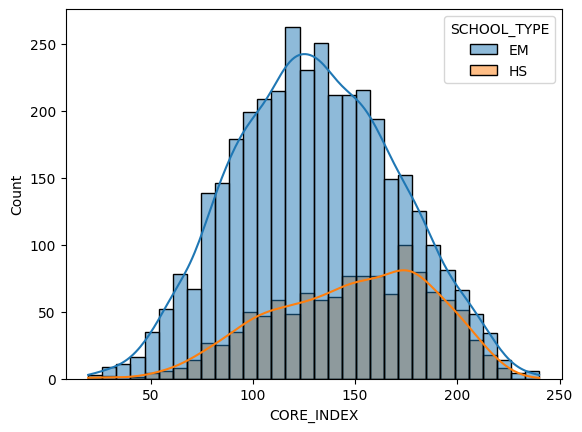

In [18]:
# dfcomb.info()
dfcomb["CORE_INDEX"] = pd.to_numeric(dfcomb["CORE_INDEX"], errors = "coerce")
dfcomb = dfcomb.dropna()
# dfcomb.info()
sns.histplot(data=dfcomb, x="CORE_INDEX", hue = "SCHOOL_TYPE", kde = True)

